<a href="https://colab.research.google.com/github/DanielDekhtyar/AI-Accelerator/blob/main/Module%208%20-%20Deep%20Learning/Ramen_%26_sushi_CNN_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import tensorflow_datasets as tfds #data sets...
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import time


In [2]:
#upload images
# הורדת קובץ ה-ZIP מגוגל דרייב
#https://drive.google.com/file/d//view?usp=sharing
zip_id = "1-0LSuoPPhxqWtFHiMlblZpkyWB4KY7W_"
!gdown --id {zip_id} -O dataset.zip

# חילוץ הקבצים
!unzip dataset.zip -d dataset
print('-'*20+'\n Upload Completed!!\n'+'-'*20)

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1-0LSuoPPhxqWtFHiMlblZpkyWB4KY7W_
From (redirected): https://drive.google.com/uc?id=1-0LSuoPPhxqWtFHiMlblZpkyWB4KY7W_&confirm=t&uuid=a9c0f888-4ac4-4703-a801-09c49dee6f3e
To: /content/dataset.zip
100% 101M/101M [00:00<00:00, 188MB/s] 
Archive:  dataset.zip
   creating: dataset/test/
   creating: dataset/train/
   creating: dataset/train/ramen/
   creating: dataset/train/sushi/
  inflating: dataset/train/ramen/104981.jpg  
  inflating: dataset/train/ramen/1045249.jpg  
  inflating: dataset/train/ramen/1019927.jpg  
  inflating: dataset/train/ramen/1014141.jpg  
  inflating: dataset/train/ramen/1015129.jpg  
  inflating: dataset/train/ramen/1002843.jpg  
  inflating: dataset/train/ramen/1034646.jpg  
  inflati

In [3]:
#Use Image ImageDataGenerator to create train_datagen and test_datagen
#make sure you rescale all sets
#use a few or all of these options for the training set:
#rotation_range,width_shift_range,height_shift_range,shear_range,zoom_rang,horizontal_flip
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 100,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.5,
    zoom_range = 0.3,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
# מחולל נתונים לבדיקה (ללא Augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
#define the train_path and the test_path
train_path = 'dataset/train'
test_path = 'dataset/test'
#use flow_from_directory to create train_generator and test_generator
#give it directory, target_sze, batch_size and class_mode (you may also want to use seed =42)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary',
    seed = 42
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary',
    seed = 42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [5]:
# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [6]:
# Compile model
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [7]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

callbacks = [reduce_lr]

In [8]:
# Train model
start_time = time.time()

history = model.fit(
    x = train_generator,
    epochs = 20,
    validation_data = test_generator,
    batch_size = 32,
    callbacks = callbacks
)

print(f"It took {time.time() - start_time} seconds to train the model")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 466ms/step - accuracy: 0.4998 - loss: 1.6137 - val_accuracy: 0.6580 - val_loss: 0.6612 - learning_rate: 0.0010
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 248ms/step - accuracy: 0.6454 - loss: 0.6558 - val_accuracy: 0.7020 - val_loss: 0.5992 - learning_rate: 0.0010
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step - accuracy: 0.6547 - loss: 0.6358 - val_accuracy: 0.6320 - val_loss: 0.6507 - learning_rate: 0.0010
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 259ms/step - accuracy: 0.6740 - loss: 0.6074 - val_accuracy: 0.7200 - val_loss: 0.5608 - learning_rate: 0.0010
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 227ms/step - accuracy: 0.6987 - loss: 0.5990 - val_accuracy: 0.7280 - val_loss: 0.5639 - learning_rate: 0.0010
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 224ms/step - accuracy: 0.6803 - loss: 0.6072 - val_accuracy: 0.7380 - val_loss: 0.5551 - learning_rate: 0.0010
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 233ms/step - accuracy: 0.7369 - loss: 0.

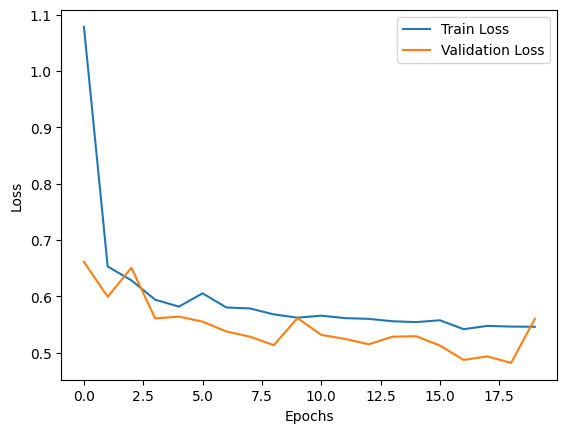

In [9]:
# Plt Loss Curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

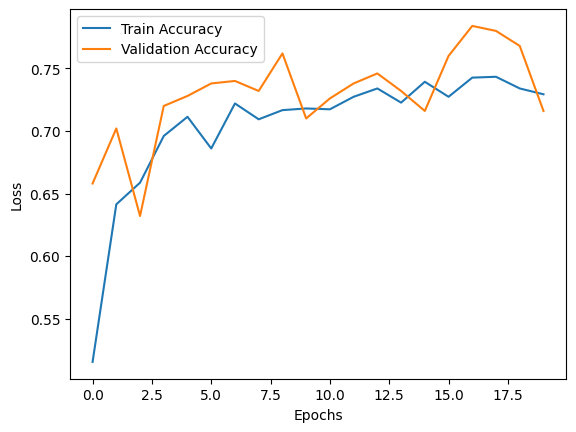

In [10]:
# Plot Accuracy Curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 350464)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      44,859,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,615,045 (513.52 MB)

 Trainable params: 44,871,681 (171.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 89,743,364 (342.34 MB)